<a href="https://colab.research.google.com/github/henrypoon1216/henry-s-project/blob/main/Player_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Football Player Value Data Analysis Project**
By Henry

**1. Data Importing**

Download the "player_valuations.csv" in Football Data from Transfermarkt from Kaggle. The URL of the website is https://www.kaggle.com/datasets/davidcariboo/player-scores?resource=download&select=player_valuations.csv.

In [ ]:
import pandas as pd
value = pd.read_csv("/content/player_valuations.csv")
value

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
483399,982267,2024-10-18,6000000,800,IT1
483400,1077175,2024-10-18,3000000,252,IT1
483401,1083164,2024-10-18,1000000,252,IT1
483402,1110645,2024-10-18,500000,398,IT1


Note that the market value is estimated by transfermarkt, not the fair value of a player. Hence, we look into the actual transfer fee of a player, from the URL https://www.kaggle.com/datasets/davidcariboo/player-scores?resource=download&select=transfers.csv

Meanwhile, we get the club information from https://www.kaggle.com/datasets/davidcariboo/player-scores?resource=download&select=clubs.csv
to filter the data.

In [ ]:
transfer = pd.read_csv("/content/transfers.csv")
transfer

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,100000.0,Georgios Katris
4,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves
...,...,...,...,...,...,...,...,...,...,...
77911,35207,1995-07-01,95/96,42281,11896,PTSV Dort. Yth.,Dortmund Yth.,0.0,NaN,Marco Reus
77912,22141,1994-07-01,94/95,59178,29463,Castellammare,Sorrento Youth,NaN,NaN,Antonio Mirante
77913,33829,1994-07-01,94/95,58405,53957,FC Penafiel You,Sporting Yth.,NaN,NaN,José Fonte
77914,40680,1994-07-01,94/95,47320,47318,Lichtenw. Yth.,Schornbach Yth.,0.0,NaN,Sven Ulreich


In [ ]:
club = pd.read_csv("/content/clubs.csv")
club

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.3,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,19,73.1,19,Olimpico di Roma,73261,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.6,18,69.2,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,NaN,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,27,27.1,15,55.6,19,Gewiss Stadium,24950,+€18.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,NaN,28,25.5,6,21.4,1,Ukraina,28051,€-1.18m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,24,26.5,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


# A. Analyse Trend of Market Value

**A2. Data Cleaning**

This is a Tableau Public plot showing the number of data points in each year. It shows that there are only 1, 1 and 2 data in 2000, 2001 and 2003, but increase significantly since 2004. This might be due to contamination or loss of data set at the beginning period. Hence, we will remove it for our analysis.

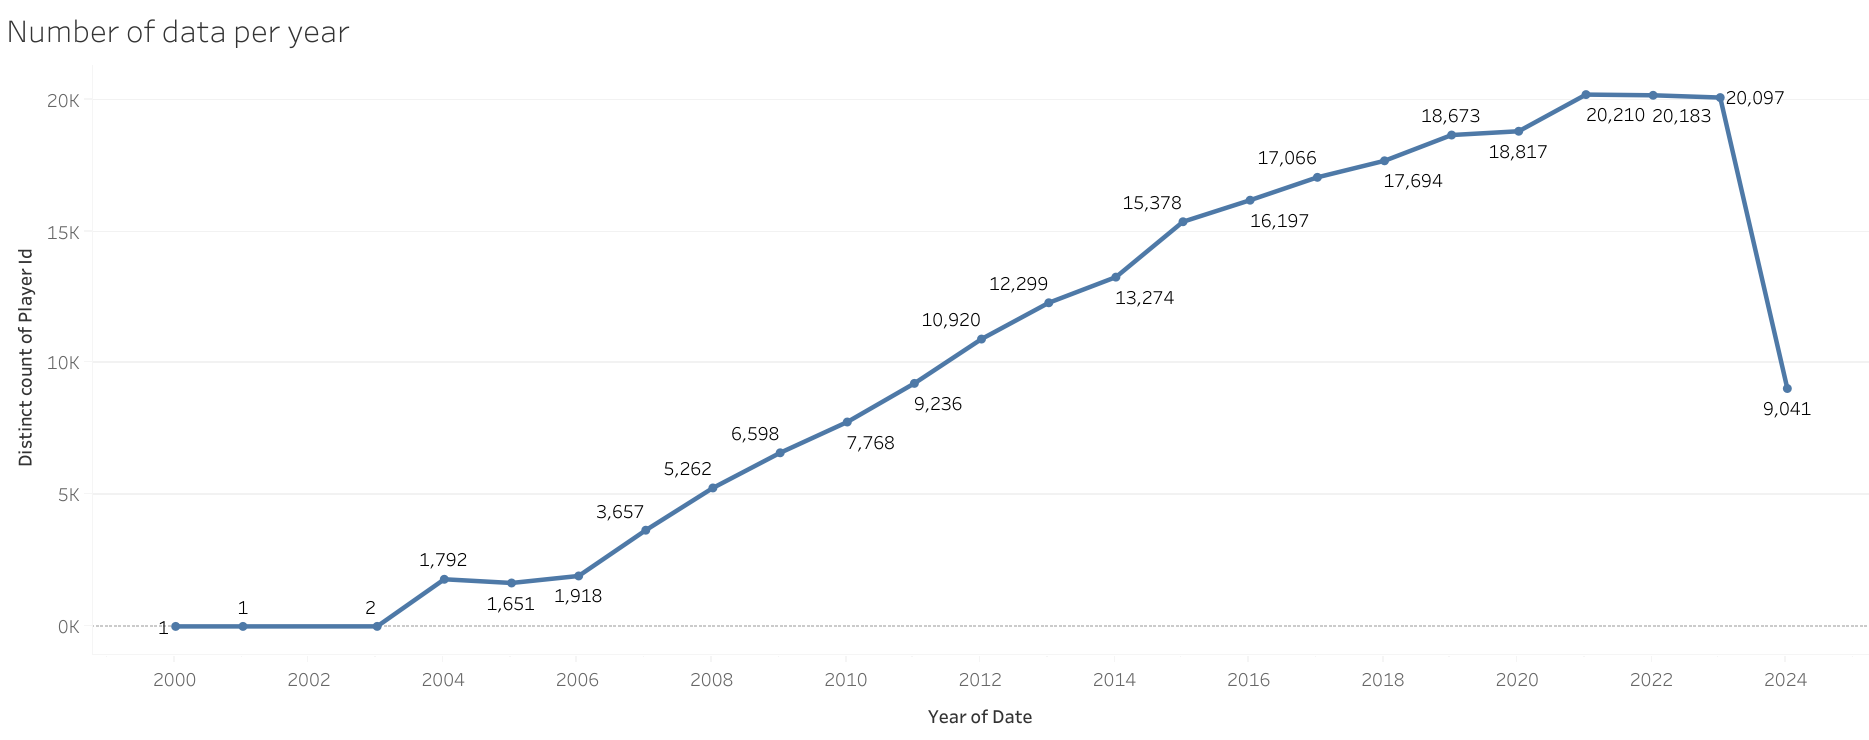

In [ ]:
value = value.loc[4:, ]
value.groupby('player_id').player_id.count()

,player_id
player_id,
10,23
26,27
65,28
77,22
80,31
...,...
1263365,1
1287735,1
1290268,1


**A3. Data Manipulation**
I will use different techniques to shape the dataset for analysis.

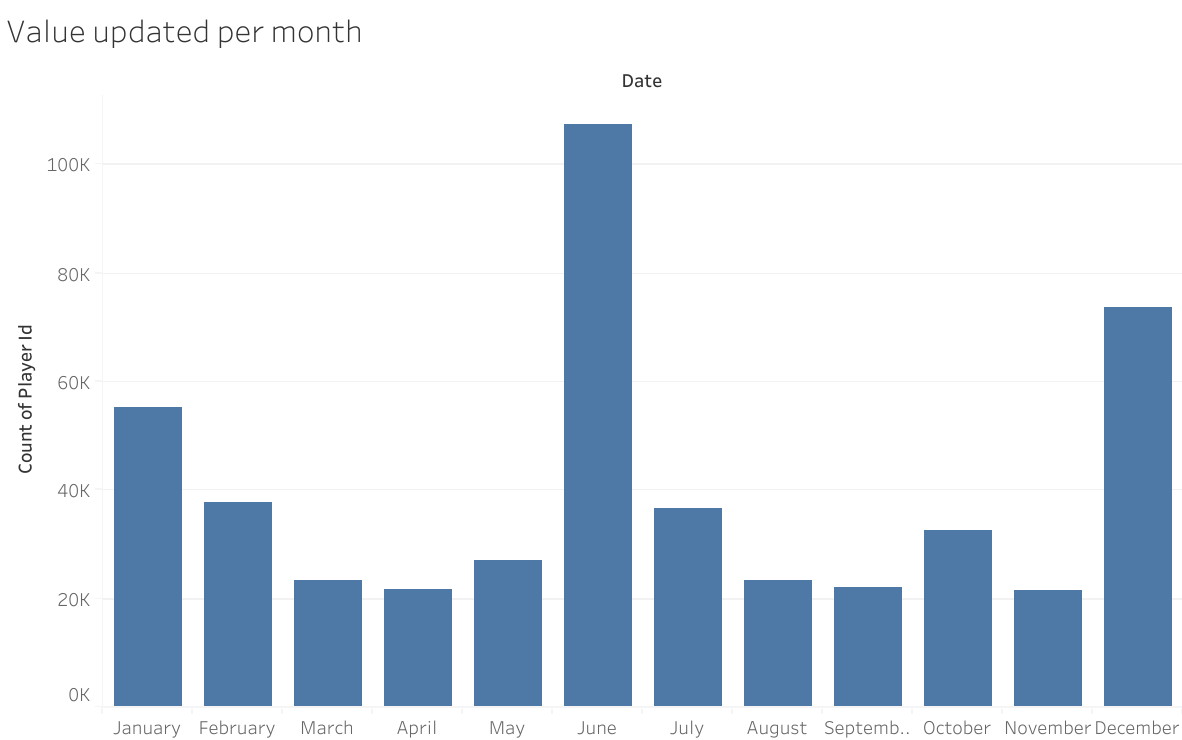

This Tableau Public Plot shows that the market value mainly updated in June, while December and January are the second peak of the trend. The football seasons generally start in August and end in May next year. June may be an update based on a player's whole year performance, while the winter update is based on the season's first-half performance.

My objective is to analyse the rate of change of players' value in different period. Hence, we will Divide the date into periods, with a length of 6 months, between each year's 1/6 and 30/11 and also 1/12 to next year's 31/5. To avoid new data, which is supposed to be small as Transfermarkt expands its network to weaker football countries, we just look at the data of the Top 5 leagues. They are England, Spain, Germany, Italy and France.

In [ ]:
start_date = pd.Timestamp('2004-06-01')
period_index = pd.period_range(start='2004-06-01', end='2024-11-30', freq='6M')
end_date = start_date + pd.DateOffset(months=6)
list_1 = ['ES1', 'FR1', 'GB1', 'IT1', 'L1']
# Function to assign period based on the date
def assign_period(date):
    if start_date <= date and date <= end_date:  # up to 2004-11-30
        return 1
    elif date > end_date:
        # Calculate the number of periods since the start
        return (date.to_period('6M') - period_index[0]).n//6 + 1
value['period'] = pd.to_datetime(value['date']).apply(assign_period)
value_new = value.loc[value.player_club_domestic_competition_id.isin(list_1)]

<ipython-input-3-c32769d158fe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['period'] = pd.to_datetime(value['date']).apply(assign_period)


We install SQL to apply our data management in a more convenient way. Here, we look at the average players' change in maximum value from the last period to analyze the average change in market value from each period.

In [ ]:
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=76870df5aca15b862bd36d9163743682d7604695f73277301b511ec06d863ec1
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
output = pysqldf("""
SELECT period, AVG(change)
FROM (
  SELECT *
  FROM (
    SELECT
        player_id,
        period,
        MAX(market_value_in_eur) - LAG(MAX(market_value_in_eur)) OVER(
            PARTITION BY player_id
            ORDER BY period
            ROWS BETWEEN 1 PRECEDING AND CURRENT ROW
        ) AS change
    FROM value_new
    GROUP BY player_id, period
  ) AS subquery
  WHERE change IS NOT NULL) AS subsubquery
  GROUP BY period
""")


**A4. Data Analysis**

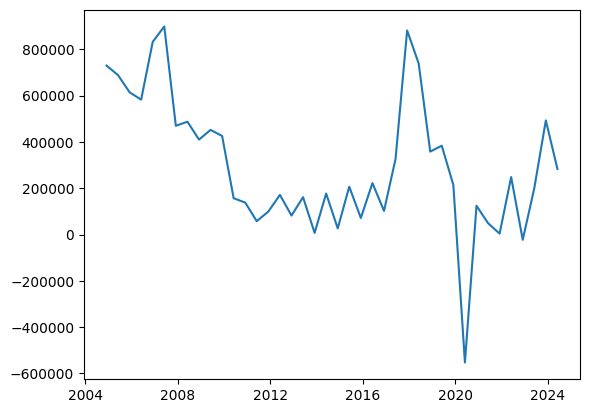

In [ ]:
import matplotlib.pyplot as plt
def assign_start_date(index):
    return start_date + (index - 1) * pd.DateOffset(months=6)
output['period'] = output['period'].apply(assign_start_date)
plt.plot(output.period, output['AVG(change)'])

We can see the diagram shows a significant change in market value first in 2017/12/01 to 2018/05/31. The average change is approximately 880 thousand change in euros. We will do a Hypothesis testing with a significance level of 0.05 against the change in that period equal to the mean of change to prove that the change in that period deviates from normal changes significantly.


Between 2020/06/01 to 2020/11/30, there is a huge drop in player's market value. I will also do a Hypothesis Testing against the closeness to normal change.

In [ ]:
from scipy import stats
p_value_2017 = 1 - stats.t.cdf((output.loc[26, 'AVG(change)'] - output['AVG(change)'].mean())/(output['AVG(change)'].std()), 39)
p_value_2020 = stats.t.cdf((output.loc[31, 'AVG(change)'] - output['AVG(change)'].mean())/(output['AVG(change)'].std()), 39)

In [ ]:
print(p_value_2017)
print(p_value_2020)

0.027922414045416954
0.0031305230433002445


For the first change, the p-value is 0.0279 which is less than our significance level of 0.05. It proves that the change after 2017/12/01 deviates significantly from normal change. This is due to the record-breaking 222 million euro transfer fee for the Brazilian Neymar transferred to Paris-Saint German, mainly owned by Qatar Sports Investment. Transfermarkt has found how rich the Middle East investors are, with the highest transfer fee increased more than once. This breaking news forced them to adjust the player's market value upward.

For the second change, it has a much smaller p-value to prove the change is significant. This large drop is mainly due to the recession after the outbreak of COVID-19.

# B. Accuracy of Estimated Market Value

**B2. Data Cleaning**

Since the transfer fee may be confidential or not updated yet, we remove the data with na or 0 fee. Also, we remove na rows in the estimated market value column to promote comparability.

In [ ]:
transfer_new = transfer.dropna(subset = ['transfer_fee', 'market_value_in_eur'])
transfer_new = transfer_new.loc[transfer.transfer_fee != 0]
transfer_new

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
8,149729,2025-07-01,25/26,294,114,Benfica,Besiktas,2000000.0,3800000.0,João Mário
11,278343,2025-07-01,25/26,167,114,FC Augsburg,Besiktas,5000000.0,8500000.0,Felix Uduokhai
12,283994,2025-07-01,25/26,39,3911,1.FSV Mainz 05,Stade Brestois,2000000.0,3000000.0,Ludovic Ajorque
13,287579,2025-07-01,25/26,430,36,Fiorentina,Fenerbahce,13000000.0,22000000.0,Sofyan Amrabat
14,301238,2025-07-01,25/26,2919,506,Monza,Juventus,14300000.0,18000000.0,Michele Di Gregorio
...,...,...,...,...,...,...,...,...,...,...
77092,7825,2005-07-04,05/06,1050,31,Villarreal,Liverpool,9800000.0,4500000.0,Pepe Reina
77113,29241,2005-07-01,05/06,720,121,FC Porto,Dinamo Moscow,3500000.0,3500000.0,Thiago Silva
77114,29712,2005-07-01,05/06,986,29,Cambridge Utd.,Everton,375000.0,350000.0,John Ruddy
77333,14555,2005-01-21,04/05,399,31,Leeds,Liverpool,1400000.0,750000.0,Scott Carson


**B3. Data Manipulation**

In [ ]:
X_bar = transfer_new.transfer_fee.mean()
Y_bar = transfer_new.market_value_in_eur.mean()
var_X = transfer_new.transfer_fee.var()
var_Y = transfer_new.market_value_in_eur.var()
n = len(transfer_new)

In [ ]:
import math
p_value_actual_fee = (1 - stats.t.cdf((X_bar - Y_bar)/math.sqrt((var_X + var_Y)/n), round((n - 1) * (var_X / n + var_Y / n) ** 2 / ((var_X / n) ** 2 + (var_Y / n ) ** 2))))/2

In [ ]:
p_value_actual_fee

3.6007902913803846e-06

**B4. Data Analysis**
I have done a Hypothesis testing that the estimated market value is equal to the actual transfer fee. It turns out the values deviate significantly as the p-value is very small.

# C. Relationship of Transfer Fee to Domestic and World Economy

**C2. Data Cleaning**

We will select the famous football league in the world, the Premier League, as a sample to investigate.

In [ ]:
new_list = club.loc[club.domestic_competition_id == "GB1",'club_id']
transfer_new = transfer_new.loc[transfer_new.to_club_id.isin(new_list)]

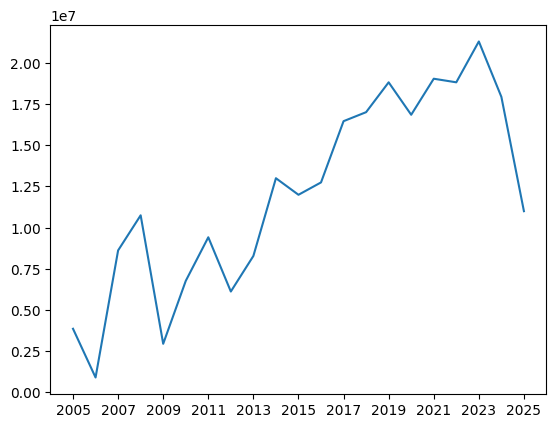

In [ ]:
output_new = pysqldf("""SELECT strftime('%Y', transfer_date) AS year, AVG(transfer_fee) AS avg_fee
FROM transfer_new
GROUP BY year
""")
from matplotlib.ticker import MultipleLocator
plt.plot(output_new.year, output_new['avg_fee'])
major_locator = MultipleLocator(2)  # Skip every other tick
plt.gca().xaxis.set_major_locator(major_locator)

In [54]:
gdp_uk = [
    2.42, 2.54, 2.71, 3.09, 2.93, 2.41, 2.49, 2.66, 2.71, 2.78, 3.06, 2.93, 2.69, 2.68, 2.87, 2.85, 2.7, 3.14, 3.09, 3.34]
gdp_world = [44.1, 47.8, 51.7, 58.3, 64.1, 60.7, 66.5, 74, 75.6, 77.8, 79.9, 75.4, 76.6, 81.6, 86.7, 87.9, 85.6, 97.5, 101, 105]
# Create a list of years from 2004 to 2023
years = range(2004, 2024)

# Create the DataFrame
gdp_df = pd.DataFrame(list(zip(years, gdp_uk, gdp_world)), columns=['year', 'GDP_UK', 'GDP_World'])

print(gdp_df)

    year  GDP_UK  GDP_World
0   2004    2.42       44.1
1   2005    2.54       47.8
2   2006    2.71       51.7
3   2007    3.09       58.3
4   2008    2.93       64.1
5   2009    2.41       60.7
6   2010    2.49       66.5
7   2011    2.66       74.0
8   2012    2.71       75.6
9   2013    2.78       77.8
10  2014    3.06       79.9
11  2015    2.93       75.4
12  2016    2.69       76.6
13  2017    2.68       81.6
14  2018    2.87       86.7
15  2019    2.85       87.9
16  2020    2.70       85.6
17  2021    3.14       97.5
18  2022    3.09      101.0
19  2023    3.34      105.0


**C3. Data Manipulation**

In [55]:
import numpy as np
output_2 = pysqldf(""" SELECT t.year AS year, t.avg_fee AS avg_fee, g.GDP_UK AS gdp_UK, g.gdp_World AS gdp_World
FROM output_new AS t
INNER JOIN gdp_df AS g
ON t.year = g.year
""")
output_2.to_csv("gdp_versus_average_transfer_fee.csv", index = False)

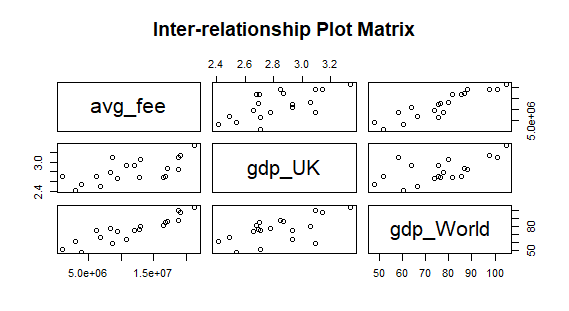

This is a scatterplot matrix of the three variables from R. It shows that there is a positive correlation among them and they are dependent to each other.

**C4. Data Analysis**

Call:
lm(formula = avg_fee ~ gdp_UK, data = df)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -34669220   12990483  -2.669  0.01619  
gdp_UK       16442272    4582820   3.588  0.00227

Multiple R-squared:  0.4309,	Adjusted R-squared:  0.3974


Call:
lm(formula = avg_fee ~ gdp_World, data = df)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14940341    3069183  -4.868 0.000145       
gdp_World      349184      39328   8.879 8.59e-08

Multiple R-squared:  0.8226,	Adjusted R-squared:  0.8122


These are some important data got from the R language in my file. We can find that the R-Squared value of transfer fee against the country's GDP is much lower than that of the world. It means that the transfer fee in Premier League is more associated to the world's GDP, which is an interesting finding.

**5. Conclusion**

For the football player market value dataset, I find that the estimated market value will be adjusted base on some breaking news or global economy. But the estimation of fair value is inaccurate. On the other hand, we found the average transfer fee in the top tier England league is not affected much on domestic economy, it is more likely to be a global issue.